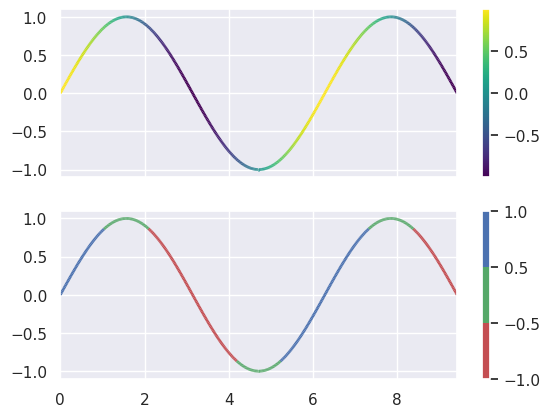

In [37]:
# 绘制渐变线
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

sns.set_theme()
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

In [ ]:
# plot for scenario1~3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

doc_path = "../results/scenario3.1/output_data/"

datas = []
for i in range(4):
    file_name = "scenario3-controller{}.xlsx".format(i)
    file_path = doc_path+file_name
    df = pd.read_excel(file_path)
    datas.append(df)
print(len(datas))

sns.set_theme(style="ticks")
fig, axs = plt.subplots(figsize=(9, 5))
axs.set_xlabel('X/m')
axs.set_ylabel('Y/m')
axs.set_xlim(-0.5, 7.0)
axs.set_ylim(-1.5, 1.5)
plt.title("Robot path (Scenario3) ")
plt.tight_layout()
axs.axis('equal')   

controllers_list = ['DC', 'SCBF', 'DCBF', 'ACBF']
color_ls = ['Purples_r','Blues_r','Greens_r','Oranges_r',]

# robot path for 4 controllers
for i in range(4):
    # i=0
    ro_x = datas[i]['robot_x'].to_numpy()
    ro_y = datas[i]['robot_y'].to_numpy()
    dist_min = datas[i]['min_dist'].to_numpy()

    points = np.array([ro_x, ro_y]).T.reshape(-1,1,2) 
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(dist_min.min(),dist_min.max()+2)

    lc = LineCollection(segments, cmap=color_ls[i], norm=norm, label=controllers_list[i])
    lc.set_array(dist_min)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    if i == 3:
        fig.colorbar(line, ax=axs)

# Plot moving obstacle trajectory
if config.moving_obstacles_on is True:
    for i in range(len(config.moving_obs)):
        # Plot final position
        axs.add_patch(plt.Circle((datas[0]['obs_x'+str(i)].to_numpy()[-1], 
                                    datas[0]['obs_y'+str(i)].to_numpy()[-1]),
                                    config.moving_obs[i][4], color='k', alpha=0.9, 
                                    label="Moving Obstacle path"))
        # Plot path
        axs.plot(datas[0]['obs_x'+str(i)].to_numpy(), datas[0]['obs_y'+str(i)].to_numpy(),
                'k--', alpha=0.9)

# Plot initial position
axs.plot(config.x0[0], config.x0[1], 'b.', markersize=16, label="Initial position")

# Plot goal
axs.plot(config.goal[0], config.goal[1], 'g*', markersize=16, label="Goal")

# Only show unique legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show()


y_max=:3.60, y_min=-2.48
dy_max=:1.42, dy_min=-1.42
x_max=:2.74, x_min=-2.74
dx_max=:1.01, dx_min=-1.25


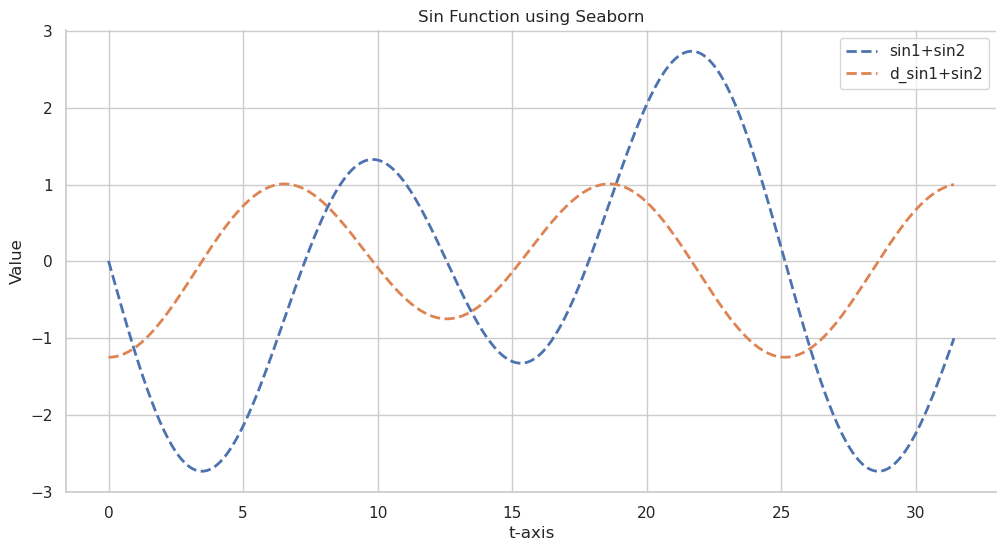

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成示例数据
slower = 4
t = np.linspace(0, 2 * np.pi * 5, 400)
dt = np.full(400, 3.14)
y1 = 6*     np.cos(t/slower+dt)
y2 = -6*2*  np.cos(2*t/slower+dt) 
y = (y1+y2)/5
dy = (-6/slower*np.sin(t/slower+dt) +6*2*2/slower*np.sin(2*t/slower+dt))/5

x1 = 6*     np.sin(t/slower+dt)
x2 = 6*2*   np.sin(2*t/slower+dt)  
x = (x1+x2)/6
dx = (6/slower*np.cos(t/slower+dt) + 6*2*2/slower*np.cos(2*t/slower+dt))/6
# 设置Seaborn主题和风格
sns.set_theme(context="notebook", style="whitegrid")

# 绘制sin函数的线图
plt.figure(figsize=(12, 6))
# sns.lineplot(x=t, y=y1, linewidth=2 ,label="cos1(t)")
# sns.lineplot(x=t, y=y2, linewidth=2, label="cos2(t)")
# sns.lineplot(x=t, y=y, linewidth=2, label="cos1+cos2")
# sns.lineplot(x=t, y=dy, linewidth=2, label="d_cos1+cos2")
sns.lineplot(x=t, y=x, linewidth=2, label="sin1+sin2", linestyle="--")
sns.lineplot(x=t, y=dx, linewidth=2, label="d_sin1+sin2", linestyle="--")

y_max = max(y)
y_min = min(y)
dy_max = max(dy)
dy_min = min(dy)
print('y_max=:{:.2f}, y_min={:.2f}'.format(y_max, y_min))
print('dy_max=:{:.2f}, dy_min={:.2f}'.format(dy_max, dy_min))

x_max = max(x)
x_min = min(x)
dx_max = max(dx)
dx_min = min(dx)
print('x_max=:{:.2f}, x_min={:.2f}'.format(x_max, x_min))
print('dx_max=:{:.2f}, dx_min={:.2f}'.format(dx_max, dx_min))

# 添加标题和标签
plt.title("Sin Function using Seaborn")
plt.xlabel("t-axis")
plt.ylabel("Value")

# 显示图例
plt.legend()

# 去除图形周围的轴线
sns.despine()

# 显示图形
plt.show()
